In [77]:
import pandas as pd,numpy as np

In [78]:
df=pd.read_csv('dataset.csv')
df.head()

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold_On            4000 non-null   object
 1   Size               4000 non-null   object
 2   Ingredients_Cost   4000 non-null   int64 
 3   Design_Complexity  4000 non-null   object
 4   Time_Taken         4000 non-null   int64 
 5   Price              4000 non-null   int64 
 6   Amount             4000 non-null   int64 
 7   Gender             4000 non-null   object
dtypes: int64(4), object(4)
memory usage: 250.1+ KB


In [80]:
df.isnull().sum()

Sold_On              0
Size                 0
Ingredients_Cost     0
Design_Complexity    0
Time_Taken           0
Price                0
Amount               0
Gender               0
dtype: int64

In [81]:
df.shape

(4000, 8)

In [82]:
df.duplicated().sum()

1

In [83]:
df.dtypes

Sold_On              object
Size                 object
Ingredients_Cost      int64
Design_Complexity    object
Time_Taken            int64
Price                 int64
Amount                int64
Gender               object
dtype: object

In [84]:
import matplotlib.pyplot as plt,seaborn as sns

In [85]:
df.columns

Index(['Sold_On', 'Size', 'Ingredients_Cost', 'Design_Complexity',
       'Time_Taken', 'Price', 'Amount', 'Gender'],
      dtype='object')

In [86]:
df['Sold_On'].value_counts()

Sold_On
Wednesday    598
Saturday     587
Monday       583
Friday       583
Sunday       558
Thursday     548
Tuesday      543
Name: count, dtype: int64

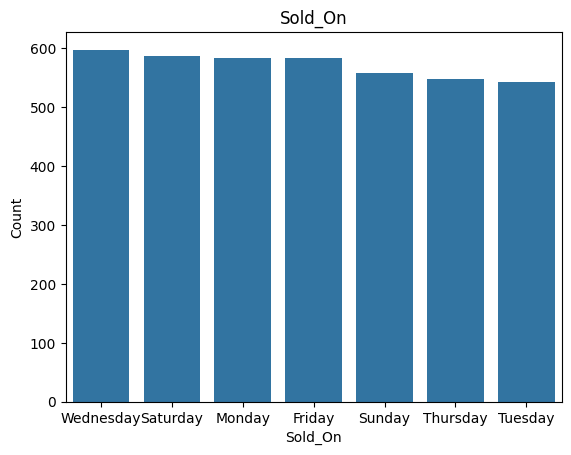

In [87]:
sns.barplot(x=df['Sold_On'].value_counts().index,y=df['Sold_On'].value_counts().values)
plt.ylabel('Count')
plt.title('Sold_On')
plt.show()

In [88]:
df['Size'].value_counts()

Size
medium    1371
large     1337
small     1292
Name: count, dtype: int64

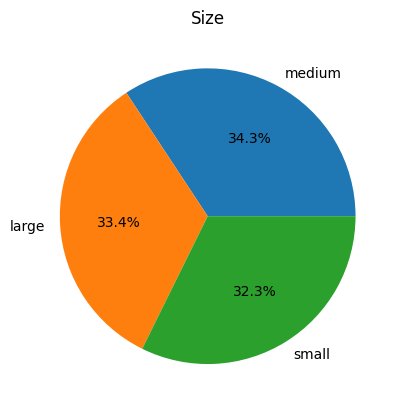

In [89]:
plt.pie(df['Size'].value_counts().values,labels=df['Size'].value_counts().index,autopct='%1.1f%%')
plt.title('Size')
plt.show()

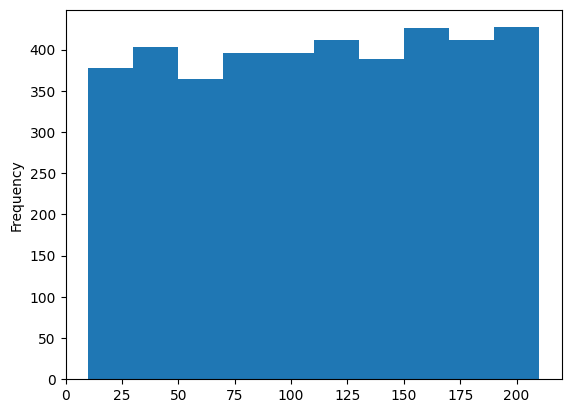

In [90]:
df['Ingredients_Cost'].plot.hist()
plt.show()

In [91]:
df['Design_Complexity'].value_counts()

Design_Complexity
simple     2028
complex    1972
Name: count, dtype: int64

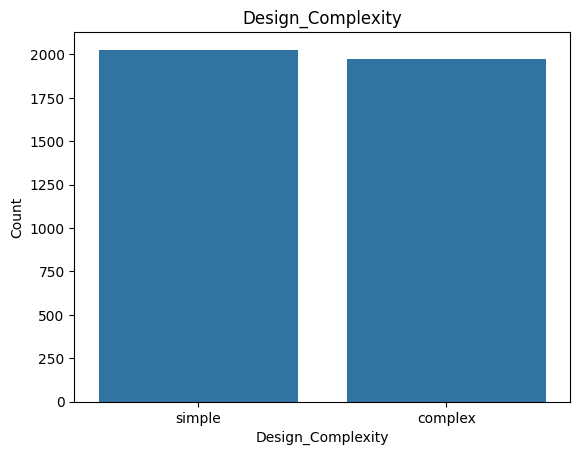

In [92]:
sns.barplot(x=df['Design_Complexity'].value_counts().index,y=df['Design_Complexity'].value_counts().values)
plt.ylabel('Count')
plt.title('Design_Complexity')
plt.show()

In [93]:
df['Time_Taken'].value_counts()

Time_Taken
3     649
5     634
2     612
4     585
1     388
11    205
6     191
8     188
9     185
10    184
7     179
Name: count, dtype: int64

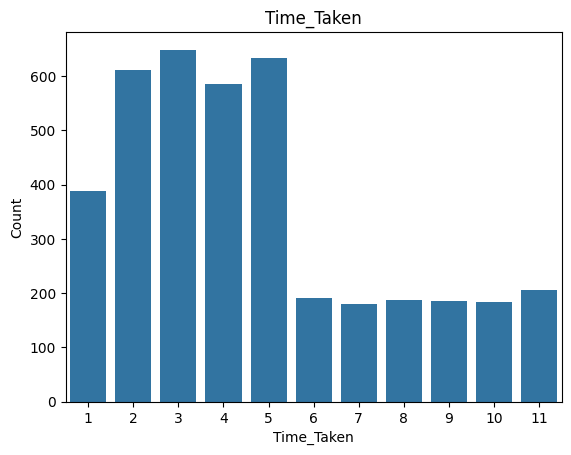

In [94]:
sns.barplot(x=df['Time_Taken'].value_counts().index,y=df['Time_Taken'].value_counts().values)
plt.ylabel('Count')
plt.title('Time_Taken')
plt.show()

In [95]:
df['Amount'].value_counts()

Amount
4     424
2     420
6     414
9     410
1     409
8     399
7     393
3     386
10    375
5     370
Name: count, dtype: int64

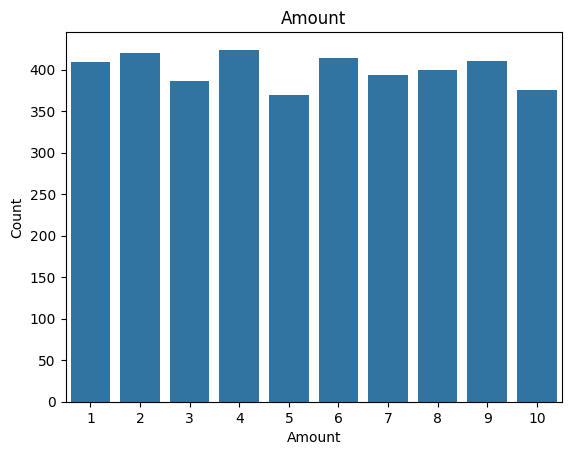

In [96]:
sns.barplot(x=df['Amount'].value_counts().index,y=df['Amount'].value_counts().values)
plt.ylabel('Count')
plt.title('Amount')
plt.show()

In [97]:
df['Gender'].value_counts()

Gender
male      2006
female    1994
Name: count, dtype: int64

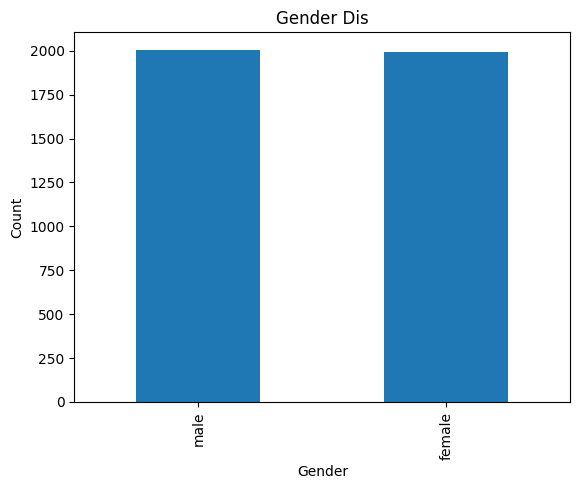

In [98]:
df['Gender'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Gender Dis')
plt.show()

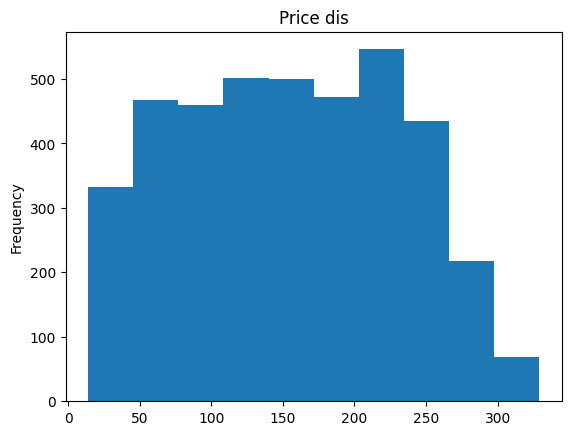

In [99]:
df.Price.plot.hist()
plt.title('Price dis')
plt.show()

In [100]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [101]:
df['Size'].value_counts()

Size
medium    1371
large     1337
small     1292
Name: count, dtype: int64

In [121]:
df['Design_Complexity'].value_counts()

Design_Complexity
1    2028
0    1972
Name: count, dtype: int64

In [118]:
df['Size']=OrdinalEncoder().fit_transform(df[['Size']])
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df['Sold_On']=LabelEncoder().fit_transform(df['Sold_On'])
df['Design_Complexity']=LabelEncoder().fit_transform(df['Design_Complexity'])

In [119]:
df['Size'].value_counts()

Size
1.0    1371
0.0    1337
2.0    1292
Name: count, dtype: int64

In [125]:
df.head()

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,1,0,28,0,6,49,10,0
1,2,1,65,1,2,93,9,0
2,6,0,96,1,5,128,8,1
3,5,1,155,1,3,198,6,0
4,2,0,20,1,2,32,5,1


In [123]:
df['Size']=df['Size'].astype(int)

In [124]:
df.dtypes

Sold_On              int64
Size                 int32
Ingredients_Cost     int64
Design_Complexity    int32
Time_Taken           int64
Price                int64
Amount               int64
Gender               int64
dtype: object

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score

In [175]:
x=df.drop('Price',axis=1)
y=df.Price

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [177]:
lr=LinearRegression()

In [178]:
lr.fit(x_train,y_train)
yhat=lr.predict(x_test)
print(yhat[0:10])
print(y_test[0:10].values)

[ 85.42157984  18.65083966  99.36308246 143.9532315   91.00718841
 127.85678277 243.66139243 128.8518274  283.0168418  159.43032145]
[ 97  23  88 131  97 114 257 126 310 172]


In [186]:
print('r2_score: ',r2_score(y_test,yhat))
print('mean_squared_error: ',mean_squared_error(y_test,yhat))

r2_score:  0.9740980024680167
mean_squared_error:  140.77484911108044
